#### Fine-tuning foundation models for specific tasks

Though the foundation models may already satisfy your requirements, it may be necessary for you to fine-tune a foundation model.

Foundation models are pretrained on a diverse range of text from the internet, making them proficient in general language understanding. However, fine-tuning allows you to tailor the model's knowledge to a specific task or domain, optimizing its performance and ensuring it excels in that particular context.

Some common tasks for which you may want to fine-tune a foundation model are:

Text classification: Categorizing a given text into predefined classes or categories based on its content or context.
Token classification: Assigning specific labels or tags to individual tokens or words in a text, often used in tasks like named entity recognition.
Question answering: Providing accurate and relevant answers to questions posed in natural language.
Summarization: Creating concise and coherent summaries of longer texts, capturing the essential information.
Translation: Converting text from one language to another while preserving the meaning and context.
As foundation models are already pretrained, you need a smaller task-specific dataset to fine-tune a foundation model. When you fine-tune a model, you're likely to need less data and compute than when you would train a model from scratch.

In [ ]:
 # https://learn.microsoft.com/en-us/azure/machine-learning/concept-endpoints?view=azureml-api-2

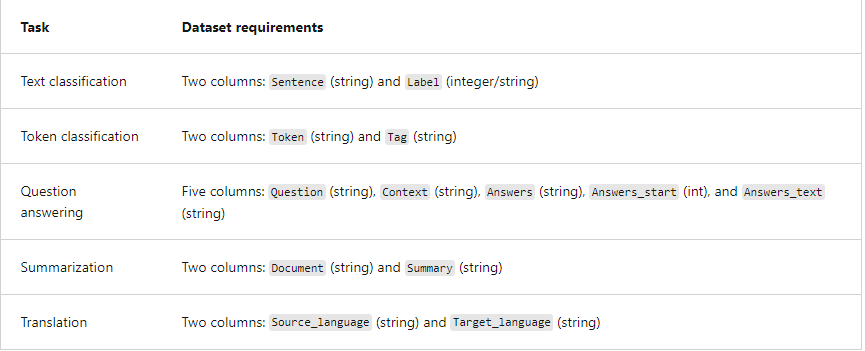

In [23]:
import urllib.request
import json
import os
import ssl
import pprint
from dotenv import dotenv_values
from dotenv import load_dotenv

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.



In [6]:
config = dotenv_values(".env")


In [15]:

samples= ["Contoso Suites exceeded our expectations with their impeccable service and luxurious amenities.", 
       "The breathtaking mountain views from our room at Alpine Ski House made our stay truly magical.",
       "We had a disappointing experience at Margie's Travel due to the lack of cleanliness and outdated facilities.",
       "The cozy fireplace in our room at Alpine Ski House created a warm and inviting atmosphere after a day on the slopes.", 
       "The rooftop pool at Contoso Suites offered a stunning panoramic view of the city, making our stay unforgettable."]



In [16]:
# Request data goes here
# The example below assumes JSON formatting which may be updated
# depending on the format your endpoint expects.
# More information can be found here:
# https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
text=samples[0]
data =  {
  "input_data": [
    f"{text}"
  ],
  "params": {
    "return_all_scores": True
  }
}
data

{'input_data': ['Contoso Suites exceeded our expectations with their impeccable service and luxurious amenities.'],
 'params': {'return_all_scores': True}}

In [26]:

responses= []


url = 'https://azure-ml-xrhhu.uksouth.inference.ml.azure.com/score'
# Replace this with the primary/secondary key or AMLToken for the endpoint
api_key = config.get('ENDPOINT_KEY')
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

# The azureml-model-deployment header will force the request to go to a specific deployment.
# Remove this header to have the request observe the endpoint traffic rules
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'review-hotel-classification-m-1' }

req = urllib.request.Request(url, body, headers)

for t in samples:
    data =  {
  "input_data": [
    f"{t}"
  ],
  "params": {
    "return_all_scores": True
  }
}
    #encode  request
    body = str.encode(json.dumps(data))
    try:
        response = urllib.request.urlopen(req)
    
        result = response.read().decode("utf8", 'ignore')
        responses.append({t: json.loads(result)[0]})
    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))
    
        # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))

In [30]:
for r in responses:
    pprint.pprint(list(r.keys())[0])
    pprint.pprint(list(r.values()))
    print("\n")

('Contoso Suites exceeded our expectations with their impeccable service and '
 'luxurious amenities.')
[{'0': {'label': 'Average', 'score': 0.0066314334981143475},
  '1': {'label': 'Excellent', 'score': 0.019722113385796547},
  '2': {'label': 'Poor', 'score': 0.02784910425543785},
  '3': {'label': 'Terrible', 'score': 0.0044416100718081},
  '4': {'label': 'Very good', 'score': 0.9413557052612305}}]


('The breathtaking mountain views from our room at Alpine Ski House made our '
 'stay truly magical.')
[{'0': {'label': 'Average', 'score': 0.0066314334981143475},
  '1': {'label': 'Excellent', 'score': 0.019722113385796547},
  '2': {'label': 'Poor', 'score': 0.02784910425543785},
  '3': {'label': 'Terrible', 'score': 0.0044416100718081},
  '4': {'label': 'Very good', 'score': 0.9413557052612305}}]


("We had a disappointing experience at Margie's Travel due to the lack of "
 'cleanliness and outdated facilities.')
[{'0': {'label': 'Average', 'score': 0.0066314334981143475},
  '1': {'labe